# Relations Definition Check

## Setup

### Imports

In [2]:
# Type imports
from typing import Any, Dict, Tuple, List

# Standard Libraries
from enum import Enum, auto
from pathlib import Path
from math import sqrt, pi, sin, cos, tan, radians
from statistics import mean
from itertools import zip_longest
from dataclasses import dataclass, field, asdict

# Shared Packages
import numpy as np
import pandas as pd
#import xlwings as xw
import matplotlib.pyplot as plt
#import PySimpleGUI as sg
import pydicom
import shapely
from shapely.plotting import plot_polygon, plot_points

# Local functions and classes
from types_and_classes import *
from utilities import *
from metrics import *
from relations import *
from debug_tools import *


### Global Settings

In [3]:
PRECISION = 3


In [4]:
%matplotlib inline

# Structure Relationship Definitions

## Color Coding
<table style="border: 2px solid black; width=50px;"><tr><td>
<ul style="font-weight: 900; font-size: 20px;">
<li style="color: blue;">region a</li>
<li style="color: green;">region b</li>
<li style="color: orange;">intersection of a & b</li></ul>
</tr></td></>

## Surrounds

<link rel="stylesheet" href="relations.css">
<table width="400px">
<tr class="l"><th>Surrounds</th><th>Transitive</t></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> have no interior points in common, and with holes filled <span class="b">b</span> lies in the interior of <span class="a">a</span>.
</td></tr><tr><td>
<img src="../../Images/Relationships/surrounds simple.png" alt="surrounds simple">
<img src="../../Images/Relationships/surrounds with ring.png" alt="surrounds ring">
</td><td>
<table class="f">
<tr><th/><th>Hull</th><th>Exterior</th><th>Region</th></tr>
<tr><th>Matrix</th>
<td class="na">N/A</td>
<td><table class="matrix">        
    <tr><td>2</td><td>*</td><td>*</td></tr>
    <tr><td>*</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    </table>
    </td>
<td><table class="matrix">        
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
</tr><tr class="bin">
<th>Mask</th><td><span>000000000</span></td><td><span>100010110</span></td><td><span>110110000</span></td></tr>
<tr class="bin">
<th>Value</th><td><span>000000000</span></td><td><span>100000000</span></td><td><span>000000000</span></td></tr>
<tr class="bin">
<th>Definition</th><td>*********</td><td><b><i>T***F*FF*</i></b></td><td>FF*FF****</td></tr>
</table></td></tr></table>


In [5]:
surrounds_def = RelationshipTest(
    RelationshipType.SURROUNDS,
    0b000000000100010110110110000,
    0b000000000100000000000000000)
RelationshipTest(
    RelationshipType.SURROUNDS,
    0b000000000100010110110110000,
    0b000000000100000000000000000),


(RelationshipTest(Relationship: Surrounds
     mask =  0b000000000100010110110110000
     value = 0b000000000100000000000000000,)

## Shelters

<link rel="stylesheet" href="relations.css">
<table width="400px">
<tr class="l"><th>Shelters</th><th>Transitive</th></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> 
have no points in common, 
but the Convex Hull of <span class="a">a</span> contains <span class="b">b</span>.
</td></tr>
<tr><td>
<img src="../../Images/Relationships/shelters.png" alt="Shelters">
</td><td>
<table class="f">
<tr><th/><th>Hull</th><th>Exterior</th><th>Region</th></tr>
<tr><th>Matrix</th>
<td><table class="matrix">        
    <tr><td>2</td><td>1</td><td>2</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    <tr><td>F</td><td>*</td><td>*</td></tr>
    </table>
    </td>
<td><table class="matrix">        
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
<td><table class="matrix">        
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
</tr>
</tr><tr class="bin">
<th>Mask</th><td><span>111000100</span></td><td><span>110110000</span></td><td><span>110110000</span></td></tr>
<tr class="bin">
<th>Value</th><td><span>111000000</span></td><td><span>000000000</span></td><td><span>000000000</span></td></tr>
<tr class="bin">
<th>Definition</th><td><b><i>TTT***F**</i></b></td><td>FF*FF****</td><td>FF*FF****</td></tr>
</table></td></tr></table>

In [6]:
shelters_def = RelationshipTest(
    RelationshipType.SHELTERS,
    0b111000100110110000110110000,
    0b111000000000000000000000000)
RelationshipTest(
    RelationshipType.SHELTERS,
    0b111000100110110000110110000,
    0b111000000000000000000000000),


(RelationshipTest(Relationship: Shelters
     mask =  0b111000100110110000110110000
     value = 0b111000000000000000000000000,)

## Disjoint

<link rel="stylesheet" href="relations.css">
<table width="600px">
<tr class="l"><th>Disjoint</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The Convex Hull of 
<span class="a">a</span> has no points in common wuth <span class="b">b</span>.</td></tr>
<tr><td>
<img src="../../Images/Relationships/disjoint.png" alt="Disjoint" style="width: 640px">
</td><td>
<table class="f">
<tr><th/><th>Hull</th><th>Exterior</th><th>Region</th></tr>
<tr><th>Matrix</th>
<td><table class="matrix">        
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
<td><table class="matrix">        
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
<td><table class="matrix">        
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
</tr>
</tr><tr class="bin">
<th>Mask</th><td><span>110110000</span></td><td><span>110110000</span></td><td><span>110110000</span></td></tr>
<tr class="bin">
<th>Value</th><td><span>000000000</span></td><td><span>000000000</span></td><td><span>000000000</span></td></tr>
<tr class="bin">
<th>Definition</th><td>FF*FF****</td><td>FF*FF****</td><td>FF*FF****</td></tr>
</table></td></tr></table>

In [7]:
disjoint_def = RelationshipTest(
    RelationshipType.DISJOINT,
    0b110110000110110000110110000,
    0b000000000000000000000000000)
RelationshipTest(
    RelationshipType.DISJOINT,
    0b110110000110110000110110000,
    0b000000000000000000000000000),


(RelationshipTest(Relationship: Disjoint
     mask =  0b110110000110110000110110000
     value = 0b000000000000000000000000000,)

## Borders

<link rel="stylesheet" href="relations.css">
<table width="400px">
<tr class="l"><th>Borders</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The exterior boundaries of 
<span class="a">a</span> and <span class="b">b</span> 
have more than one point in common, but their interiors do not intersect.
</td></tr>
<tr><td>
<img src="../../Images/Relationships/borders.png" alt="Borders">
<img src="../../Images/Relationships/Concave Borders.png" alt="Concave Borders">
</td><td>
<table class="f">
<tr><th/><th>Hull</th><th>Exterior</th><th>Region</th></tr>
<tr><th>Matrix</th>
<td class="na">N/A</td>
<td><table class="matrix">        
    <tr><td>*</td><td>*</td><td>2</td></tr>
    <tr><td>*</td><td>*</td><td>1</td></tr>
    <tr><td>2</td><td>1</td><td>*</td></tr>
    </table>
    </td>
<td><table class="matrix">        
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>1</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
</tr>
</tr><tr class="bin">
<th>Mask</th><td><span>000000000</span></td><td><span>001001110</span></td><td><span>110110000</span></td></tr>
<tr class="bin">
<th>Value</th><td><span>000000000</span></td><td><span>001001110</span></td><td><span>000010000</span></td></tr>
<tr class="bin">
<th>Definition</th><td>*********</td><td><b><i>**T**TTT*</i></b></td><td>FF*FT****</td></tr>
</table></td></tr></table>

In [8]:
borders_def = RelationshipTest(
    RelationshipType.BORDERS,
    0b000000000110110000110110000,
    0b000000000000010000000010000)
RelationshipTest(
    RelationshipType.BORDERS,
    0b000000000001001110110110000,
    0b000000000001001110000010000),


(RelationshipTest(Relationship: Borders
     mask =  0b000000000001001110110110000
     value = 0b000000000001001110000010000,)

## Borders_Interior

<link rel="stylesheet" href="relations.css">
<table width="400px">
<tr class="l"><th>Borders_Interior</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The interior boundary of <span class="a">a</span> 
and the exterior boundary of <span class="b">b</span> 
have more than one point in common, but their interiors do not intersect.
</td></tr>
<tr><td>
<img src="../../Images/Relationships/confines.png" alt="Confines">
<img src="../../Images/Relationships/confines with island.png" alt="Confines With Island">
</td><td>
<table class="f">
<tr><th/><th>Hull</th><th>Exterior</th><th>Region</th></tr>
<tr><th>Matrix</th>
<td><table class="matrix">        
    <tr><td>*</td><td>*</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
<td><table class="matrix">        
    <tr><td>2</td><td>*</td><td>2</td></tr>
    <tr><td>*</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    </table>
    </td>
<td><table class="matrix">        
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>1</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
</tr>
</tr><tr class="bin">
<th>Mask</th><td><span>000000000</span></td><td><span>101010110</span></td><td><span>110110000</span></td></tr>
<tr class="bin">
<th>Value</th><td><span>000000000</span></td><td><span>101000000</span></td><td><span>000010000</span></td></tr>
<tr class="bin">
<th>Definition</th><td>*********</td><td><b><i>T*T*F*FF*</i></b></td><td>FF*FT****</td></tr>
</table></td></tr></table>

**For Interior Borders _b_ Should be Within _a_**

In [9]:
interior_borders_def = RelationshipTest(
    RelationshipType.BORDERS_INTERIOR,
    0b000000000101010110110110000,
    0b000000000101000000000010000)
RelationshipTest(
    RelationshipType.BORDERS_INTERIOR,
    0b000000000101010110110110000,
    0b000000000101000000000010000),


(RelationshipTest(Relationship: Borders_interior
     mask =  0b000000000101010110110110000
     value = 0b000000000101000000000010000,)

## Partition

<link rel="stylesheet" href="relations.css">
<table width="700px">
<tr class="l"><th>Partition</th><th></th></tr>
<td class="d" colspan="2">
The boundaries of <span class="a">a</span> and <span class="b">b</span> have more than one point in common.
No points of <span class="b">b</span> are exterior to <span class="a">a</span>, and some points in <span class="a">a</span> are exterior to <span class="b">b</span>.
</td></tr>
<tr><td width=300>
<img src="../../Images/Relationships/partitions simple.png" alt="Partition">
<img src="../../Images/Relationships/partitions archipelago with island.png" alt="Partition With Island">
<img src="../../Images/Relationships/partitions partial ring.png" alt="Partition Ring">
</td><td>
<table class="f">
<tr><th/><th>Hull</th><th>Exterior</th><th>Region</th></tr>
<tr><th>Matrix</th>
<td class="na">N/A</td>
<td class="na">N/A</td>
<td><table class="matrix">        
    <tr><td>2</td><td>*</td><td>2</td></tr>
    <tr><td>*</td><td>1</td><td>*</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    </table>
    </td>
</tr>
</tr><tr class="bin">
<th>Mask</th><td><span>000000000</span></td><td><span>000000000</span></td><td><span>101010110</span></td></tr>
<tr class="bin">
<th>Value</th><td><span>000000000</span></td><td><span>000000000</span></td><td><span>101010000</span></td></tr>
<tr class="bin">
<th>Definition</th><td>*********</td><td>*********</td><td>T*T*T*FF*</td></tr>
</table></td></tr></table>

In [10]:
partition_def = RelationshipTest(
    RelationshipType.PARTITION,
    0b000000000000000000101010110,
    0b000000000000000000101010000)
RelationshipTest(
    RelationshipType.PARTITION,
    0b000000000000000000101010110,
    0b000000000000000000101010000),


(RelationshipTest(Relationship: Partition
     mask =  0b000000000000000000101010110
     value = 0b000000000000000000101010000,)

## Contains

<link rel="stylesheet" href="relations.css">
<table width="400px">
<tr class="l"><th>Contains</th><th>Transitive</th></tr>
<td class="d" colspan="2">
All points of <span class="b">b</span> lie in the interior of <span class="a">a</span>, no points of <span class="b">b</span> lie in the exterior of <span class="a">a</span>, some points in <span class="a">a</span> are exterior to <span class="b">b</span>, and the boundaries of <span class="a">a</span> and <span class="b">b</span> do not intersect.
</td></tr>
<tr><td width=300>
<img src="../../Images/Relationships/contains simple.png" alt="Contains">
<img src="../../Images/Relationships/contains with hole.png" alt="Contains With Hole">
</td><td>
<table class="f">
<tr><th/><th>Hull</th><th>Exterior</th><th>Region</th></tr>
<tr><th>Matrix</th>
<td class="na">N/A</td>
<td class="na">N/A</td>
<td><table class="matrix">        
    <tr><td>2</td><td>*</td><td>2</td></tr>
    <tr><td>*</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    </table>
    </td>
</tr>
</tr><tr class="bin">
<th>Mask</th><td><span>000000000</span></td><td><span>000000000</span></td><td><span>101010110</span></td></tr>
<tr class="bin">
<th>Value</th><td><span>000000000</span></td><td><span>000000000</span></td><td><span>101000000</span></td></tr>
<tr class="bin">
<th>Definition</th><td>*********</td><td>*********</td><td>T*T*F*FF*</td></tr>
</table></td></tr></table>

In [11]:
contains_def = RelationshipTest(
    RelationshipType.CONTAINS,
    0b000000000000000000101010110,
    0b000000000000000000101000000)
RelationshipTest(
    RelationshipType.CONTAINS,
    0b000000000000000000101010110,
    0b000000000000000000101000000),


(RelationshipTest(Relationship: Contains
     mask =  0b000000000000000000101010110
     value = 0b000000000000000000101000000,)

## Overlaps

<link rel="stylesheet" href="relations.css">
<table width="760px">
<tr class="l"><th>Overlaps</th><th>Symmetric</th></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> 
have some but not all points in common.
</td></tr>
<tr><td width=300>
<img src="../../Images/Relationships/overlaps simple.png" alt="Overlaps">
<img src="../../Images/Relationships/overlaps ring.png" alt="Overlaps With Ring">
<img src="../../Images/Relationships/overlaps surounded.png" alt="Overlaps Surrounded">
<img src="../../Images/Relationships/overlaps ring surrounds simple.png" alt="Ring Overlaps Simple">
<img src="../../Images/Relationships/archipelago contains simple.png" alt="Ring Overlaps Simple">
</td><td>
<table class="f">
<tr><th/><th>Hull</th><th>Exterior</th><th>Region</th></tr>
<tr><th>Matrix</th>
<td class="na">N/A</td>
<td class="na">N/A</td>
<td><table class="matrix">        
    <tr><td>2</td><td>*</td><td>2</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    <tr><td>2</td><td>*</td><td>*</td></tr>
    </table>
    </td>
</tr>
</tr><tr class="bin">
<th>Mask</th><td><span>000000000</span></td><td><span>000000000</span></td><td><span>101000100</span></td></tr>
<tr class="bin">
<th>Value</th><td><span>000000000</span></td><td><span>000000000</span></td><td><span>101000100</span></td></tr>
<tr class="bin">
<th>Definition</th><td>*********</td><td>*********</td><td><b><i>T*T***T**</i></b></td></tr>
</table></td></tr></table>

In [12]:
overlaps_def = RelationshipTest(
    RelationshipType.OVERLAPS,
    0b000000000000000000101000100,
    0b000000000000000000101000100)
RelationshipTest(
    RelationshipType.OVERLAPS,
    0b000000000000000000101000100,
    0b000000000000000000101000100),


(RelationshipTest(Relationship: Overlaps
     mask =  0b000000000000000000101000100
     value = 0b000000000000000000101000100,)

## Equals

<link rel="stylesheet" href="relations.css">
<table width="400px">
<tr class="l"><th>Equals</th><th>Symmetric, Transitive</th></tr>
<td class="d" colspan="2">
The interiors of <span class="a">a</span> and <span class="b">b</span> 
intersect and no part of the interior of one geometry intersects the exterior of the other.
</td></tr>
<tr><td width=300>
<img src="../../Images/Relationships/equals.png" alt="Equals">
</td><td>
<table class="f">
<tr><th/><th>Hull</th><th>Exterior</th><th>Region</th></tr>
<tr><th>Matrix</th>
<td class="na">N/A</td>
<td class="na">N/A</td>
<td><table class="matrix">        
    <tr><td>2</td><td>*</td><td>F</td></tr>
    <tr><td>*</td><td>*</td><td>F</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    </table>
    </td>
</tr>
</tr><tr class="bin">
<th>Mask</th><td><span>000000000</span></td><td><span>000000000</span></td><td><span>101001110</span></td></tr>
<tr class="bin">
<th>Value</th><td><span>000000000</span></td><td><span>000000000</span></td><td><span>100000000</span></td></tr>
<tr class="bin">
<th>Definition</th><td>*********</td><td>*********</td><td>T*F**FFF*</td></tr>
</table></td></tr></table>

In [13]:
equals_def = RelationshipTest(
    RelationshipType.EQUALS,
    0b000000000000000000101001110,
    0b000000000000000000100000000)
RelationshipTest(
    RelationshipType.EQUALS,
    0b000000000000000000101001110,
    0b000000000000000000100000000)


RelationshipTest(Relationship: Equals
    mask =  0b000000000000000000101001110
    value = 0b000000000000000000100000000

# Slice boundary Definitions



**These structures share a boundary**

| Slice Index |    1    |     2   |
|-------------|---------|---------|
| -2          | contour |         |
| -1.5        | contour |         |
| -1          | contour |         |
| -0.5        | contour |         |
| 0           |         | contour |
| 0.5         |         | contour |
| 1           |         | contour |
| 1.5         |         | contour |

**These structures overlap**

| Slice Index |    1    |     2   |
|-------------|---------|---------|
| -2          | contour |         |
| -1.5        | contour |         |
| -1          | contour |         |
| -0.5        | contour | contour |
| 0           |         | contour |
| 0.5         |         | contour |
| 1           |         | contour |



**Boundary Check process**
1. Build slice table (index= slice, columns = ROI, Data= StructureSlice)
2. Select Primary & Secondary ROI
	- Slice range = Min(starting slice) to Max(ending slice)
	- Primary & secondary ROI as separate series
3. Get next and previous for both ROIs using shift
	1. Identify primary slices missing a neighbour
	2. Send other slices for standard relation testing
4. Select boundaries for testing current vs current
	- Both on current slice
	- Both missing from a neighbour slice
5. Send these slices for standard relation testing and then apply boundary shift to results
6. Select boundaries for testing current vs next
	- Secondary not on current slice
	- Not overlapping on a neighbour slice
7. Identify neighbouring secondary slice that does not have a corresponding primary
8. Match the secondary neighbour with the current primary, send this for standard relation testing and then apply boundary shift to results
9. Send all remaining boundary slices for standard relation testing 
Merge all results and reduce to single relation

## 3D Conversion

For the beginning and ending slices of a structure the entire contour must be treated as a boundary.  The structure does not have an interior on these slices. In this case the “Interior” relations become “Boundary” relations.

<link rel="stylesheet" href="relations.css">

Structure <span class="b">b</span> ends, but 
structure <span class="a">a</span> continues.

<img class="p" src="../../Images/b interior to boundary.png" alt="b interior to boundary">

<table class="f">
<tr><th>Mask</th><th>Shift</th></tr>
<tr><td>
<table class="matrix">        
    <tr><td>1</td><td>1</td><td>1</td></tr>
    <tr><td>0</td><td>0</td><td>0</td></tr>
    <tr><td>0</td><td>0</td><td>0</td></tr>
    </table>
 </td><td>3</td></tr>
<tr class="bin">
<td colspan="2"><span>111000000111000000111000000</span></td>
</tr></table>


Structure <span class="a">a</span> ends, but 
structure <span class="b">b</span> continues.

<img class="p" src="../../Images/a interior to boundary.png" alt="a interior to boundary">

<table class="f">
<tr><th>Mask</th><th>Shift</th></tr>
<tr><td>
<table class="matrix">        
    <tr><td>1</td><td>1</td><td>1</td></tr>
    <tr><td>0</td><td>0</td><td>0</td></tr>
    <tr><td>0</td><td>0</td><td>0</td></tr>
    </table>
 </td><td>1</td></tr>
<tr class="bin">
<td colspan="2"><span>100100100100100100100100100</span></td></tr>
</table>


## Named Relationship Identification

In [14]:
def relation_example(a, b, relation_test):
    r = relate_contours(a,b)
    print('Relation Binary', bin_format(r))
    print('Relationship', relation_test.test(relate_contours(a,b)))
    plot_ab(a.contour, b.contour)

In [15]:

def surrounds_example1():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle2 = shapely.Polygon(circle_points(1))

    a = StructureSlice([circle6, circle4])
    b = StructureSlice([circle2])
    return a, b

def surrounds_example2():
    circle6 = shapely.Polygon(circle_points(3))
    circle5 = shapely.Polygon(circle_points(2.5))
    circle4 = shapely.Polygon(circle_points(2))
    circle3 = shapely.Polygon(circle_points(1.5))
    circle2 = shapely.Polygon(circle_points(1))

    a = StructureSlice([circle6, circle5, circle2])
    b = StructureSlice([circle4, circle3])
    return a, b

Surounds Mask  000000000  |  100010110  |  110110000 
Surounds Value  000000000  |  100000000  |  000000000 
Relation Binary  111001001  |  111001001  |  001001111 
Relationship Relationship: Surrounds


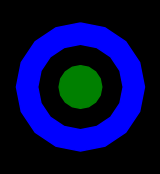

In [16]:
print('Surounds Mask', bin_format(surrounds_def.mask))
print('Surounds Value', bin_format(surrounds_def.value))

a, b = surrounds_example1()
relation_example(a, b, surrounds_def)


Relation Binary  111001001  |  111001001  |  001001111 
Relationship Relationship: Surrounds


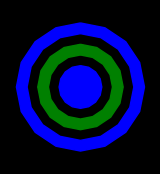

In [17]:
a, b = surrounds_example2()
relation_example(a, b, surrounds_def)

### Shelters

In [18]:

def shelters_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle5 = shapely.Polygon(circle_points(2.5))
    circle4_offset = shapely.Polygon(circle_points(2, offset_x=3.5))
    shell = shapely.difference(circle6, circle5)
    cove = shapely.difference(shell, circle4_offset)
    circle2 = shapely.Polygon(circle_points(1, offset_x=1))

    a = StructureSlice([cove])
    b = StructureSlice([circle2])
    return a, b


Shelters Mask  111000100  |  110110000  |  110110000 
Shelters Value  111000000  |  000000000  |  000000000 
Relation Binary  111001001  |  001001111  |  001001111 
Relationship Relationship: Shelters


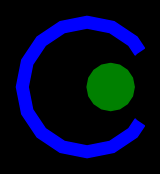

In [19]:
print('Shelters Mask', bin_format(shelters_def.mask))
print('Shelters Value', bin_format(shelters_def.value))

a, b = shelters_example()
relation_example(a, b, shelters_def)

### Disjoint

In [20]:

def disjoint_example():
    circle4_left = shapely.Polygon(circle_points(4, offset_x=-4.5))
    circle4_right = shapely.Polygon(circle_points(4, offset_x=4.5))

    a = StructureSlice([circle4_left])
    b = StructureSlice([circle4_right])
    return a, b


Disjoint Mask  110110000  |  110110000  |  110110000 
Disjoint Value  000000000  |  000000000  |  000000000 
Relation Binary  001001111  |  001001111  |  001001111 
Relationship Relationship: Disjoint


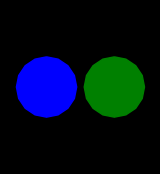

In [21]:
print('Disjoint Mask', bin_format(disjoint_def.mask))
print('Disjoint Value', bin_format(disjoint_def.value))

a, b = disjoint_example()
relation_example(a, b, disjoint_def)

## Border Relations

### Borders

In [22]:

def borders_example1():
    box4_left = shapely.Polygon(box_points(4, offset_x=-2))
    box4_right = shapely.Polygon(box_points(4, offset_x=2))

    a = StructureSlice([box4_left])
    b = StructureSlice([box4_right])
    return a, b

def borders_example2():
    box6 = shapely.Polygon(box_points(6))
    box5_up = shapely.Polygon(box_points(5, offset_y=3))
    box6_cropped = shapely.difference(box6, box5_up)

    a = StructureSlice([box6_cropped])
    b = StructureSlice([box5_up])
    return a, b

Borders Mask  000000000  |  110110000  |  110110000 
Borders Value  000000000  |  000010000  |  000010000 
Relation Binary  001011111  |  001011111  |  001011111 
Relationship Relationship: Borders


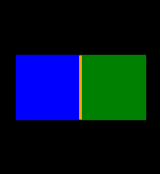

In [23]:
print('Borders Mask', bin_format(borders_def.mask))
print('Borders Value', bin_format(borders_def.value))

a, b = borders_example1()
relation_example(a, b, borders_def)

Relation Binary  111101111  |  001011111  |  001011111 
Relationship Relationship: Borders


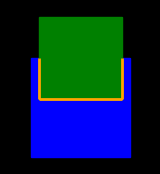

In [24]:
a, b = borders_example2()
relation_example(a, b, borders_def)

### Interior Borders

In [25]:

def interior_borders_example1():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    box4_offset = shapely.Polygon(box_points(4, offset_x=2))
    cropped_circle = shapely.difference(circle4, box4_offset)

    a = StructureSlice([circle6, circle4])
    b = StructureSlice([cropped_circle])
    return a, b

def interior_borders_example2():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle2 = shapely.Polygon(circle_points(1))

    # b has internal borders with the ring portion of a, but has an external
    # border with the island part of a. The internal borders relation wins.
    a = StructureSlice([circle6, circle4, circle2])
    b = StructureSlice([circle4, circle2])
    return a, b

def interior_borders_example3():
    # 6 cm x 6 cm box with 4cm x 4 cm hole
    box6 = shapely.Polygon(box_points(6))
    box4 = shapely.Polygon(box_points(4))
    a = StructureSlice([box6, box4])
    b = StructureSlice([box4])
    return a, b

Interior Borders Mask  000000000  |  101010110  |  110110000 
Interior Borders Value  000000000  |  101000000  |  000010000 
Relation Binary  111001001  |  111001001  |  001011111 
Relationship Relationship: Borders_interior


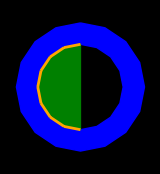

In [26]:
print('Interior Borders Mask', bin_format(interior_borders_def.mask))
print('Interior Borders Value', bin_format(interior_borders_def.value))

a, b = interior_borders_example1()
relation_example(a, b, interior_borders_def)

Relation Binary  111001001  |  111001001  |  001011101 
Relationship Relationship: Borders_interior


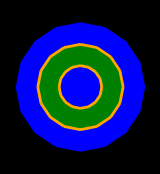

In [27]:
a, b = interior_borders_example2()
relation_example(a, b, interior_borders_def)

Relation Binary  111001001  |  111001001  |  001011101 
Relationship Relationship: Borders_interior


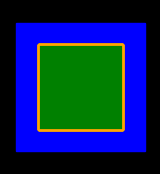

In [28]:
a, b = interior_borders_example3()
relation_example(a, b, interior_borders_def)

### Partition

In [29]:

def partition_example1():
    box6 = poly_round(shapely.Polygon(box_points(6)))
    box4_offset = shapely.Polygon(box_points(4, offset_x=-1))
    a = StructureSlice([box6])
    b = StructureSlice([box4_offset])
    return a, b

def partition_example2():
    # Rounding required because of floating point inaccuracies.
    circle6 = poly_round(shapely.Polygon(circle_points(3)))
    circle4_offset = shapely.Polygon(circle_points(2, offset_x=2))
    cropped_circle = poly_round(shapely.intersection(circle6, circle4_offset))
    a = StructureSlice([circle6])
    b = StructureSlice([cropped_circle])
    return a, b

def partition_example3():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle2 = shapely.Polygon(circle_points(1))
    a = StructureSlice([circle6, circle4, circle2])
    b = StructureSlice([circle2])
    return a, b

def partition_example4():
    # Rounding required because of floating point inaccuracies.
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    box6_offset = shapely.Polygon(box_points(6, offset_x=2))
    ring = shapely.difference(circle6, circle4)
    cropped_ring = poly_round(shapely.difference(ring, box6_offset),PRECISION)
    a = StructureSlice([circle6, circle4])
    b = StructureSlice([cropped_ring])
    return a, b

Partition Mask  000000000  |  000000000  |  101010110 
Partition Value  000000000  |  000000000  |  101010000 
Relation Binary  111011001  |  111011001  |  111011001 
Relationship Relationship: Partition


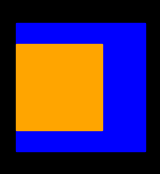

In [30]:
print('Partition Mask', bin_format(partition_def.mask))
print('Partition Value', bin_format(partition_def.value))

a, b = partition_example1()
relation_example(a, b, partition_def)

Relation Binary  111111111  |  111111111  |  111111111 
Relationship None


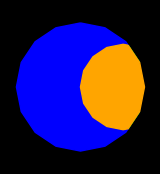

In [31]:
a, b = partition_example2()
relation_example(a, b, partition_def)

Relation Binary  111001001  |  111001001  |  101011001 
Relationship Relationship: Partition


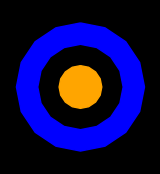

In [32]:
a, b = partition_example3()
relation_example(a, b, partition_def)

Partition Mask  000000000  |  000000000  |  101010110 
Partition Value  000000000  |  000000000  |  101010000 
Relation Binary  111011001  |  111011001  |  111011001 
Relationship Relationship: Partition


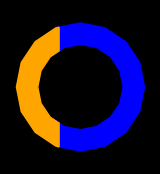

In [33]:
print('Partition Mask', bin_format(partition_def.mask))
print('Partition Value', bin_format(partition_def.value))

a, b = partition_example4()
relation_example(a, b, partition_def)

## Contains

In [34]:

def contains_example1():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    a = StructureSlice([circle6])
    b = StructureSlice([circle4])
    return a, b

def contains_example2():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle3 = shapely.Polygon(circle_points(1.5))
    circle2 = shapely.Polygon(circle_points(1))
    a = StructureSlice([circle6, circle4, circle3])
    b = StructureSlice([circle2])
    return a, b

def contains_example3():
    circle6 = shapely.Polygon(circle_points(3))
    circle5 = shapely.Polygon(circle_points(2.5))
    circle3 = shapely.Polygon(circle_points(1.5))
    circle2 = shapely.Polygon(circle_points(1))
    a = StructureSlice([circle6, circle2])
    b = StructureSlice([circle5, circle3])
    return a, b

def contains_example4():
    circle6 = shapely.Polygon(circle_points(3))
    circle3_offset_x = shapely.Polygon(circle_points(1.5, offset_x=1.2))
    a = StructureSlice([circle6])
    b = StructureSlice([circle3_offset_x])
    return a, b

def contains_example5():
    circle6 = shapely.Polygon(circle_points(3))
    circle3_offset_y = shapely.Polygon(circle_points(1.5, offset_y=-1))
    a = StructureSlice([circle6])
    b = StructureSlice([circle3_offset_y])
    return a, b

def contains_example6():
    circle4_left = shapely.Polygon(circle_points(2, offset_x=-3))
    circle4_right = shapely.Polygon(circle_points(2, offset_x=3))
    circle3_left = shapely.Polygon(circle_points(1.5, offset_x=-3))
    circle3_right = shapely.Polygon(circle_points(1.5, offset_x=3))
    circle5_up = shapely.Polygon(circle_points(2.5, offset_y=4))
    circle2_up = shapely.Polygon(circle_points(1, offset_y=3))
    circle3_down = shapely.Polygon(circle_points(1.5, offset_y=-2.5))
    circle1_down = shapely.Polygon(circle_points(0.5, offset_y=-2))
    a = StructureSlice([circle4_left, circle4_right, circle5_up, circle3_down])
    b = StructureSlice([circle3_left, circle3_right, circle2_up, circle1_down])
    return a, b


Contains Mask  000000000  |  000000000  |  101010110 
Contains Value  000000000  |  000000000  |  101000000 
Relation Binary  111001001  |  111001001  |  111001001 
Relationship Relationship: Contains


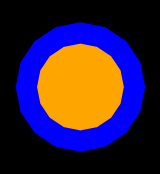

In [35]:
print('Contains Mask', bin_format(contains_def.mask))
print('Contains Value', bin_format(contains_def.value))

a, b = contains_example1()
relation_example(a, b, contains_def)

Relation Binary  111001001  |  111001001  |  111001001 
Relationship Relationship: Contains


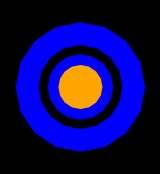

In [36]:
a, b = contains_example2()
relation_example(a, b, contains_def)

Relation Binary  111001001  |  111001001  |  111001001 
Relationship Relationship: Contains


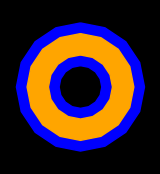

In [37]:
a, b = contains_example3()
relation_example(a, b, contains_def)

Relation Binary  111001001  |  111001001  |  111001001 
Relationship Relationship: Contains


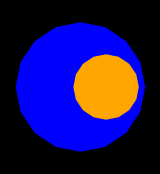

In [38]:
a, b = contains_example4()
relation_example(a, b, contains_def)

Relation Binary  111001001  |  111001001  |  111001001 
Relationship Relationship: Contains


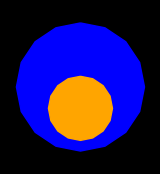

In [39]:
a, b = contains_example5()
relation_example(a, b, contains_def)

Relation Binary  111001001  |  111001001  |  111001001 
Relationship Relationship: Contains


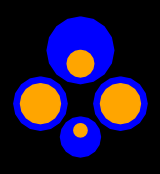

In [40]:
a, b = contains_example6()
relation_example(a, b, contains_def)

## Overlaps

In [41]:

def overlaps_simple_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle6_offset = shapely.Polygon(circle_points(3, offset_x=2))
    box4_offset = shapely.Polygon(box_points(4, offset_x=2))

    a = StructureSlice([circle6])
    b = StructureSlice([circle6_offset])
    return a, b

def overlaps_ring_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle6_offset = shapely.Polygon(circle_points(3, offset_x=2.5))

    a = StructureSlice([circle6, circle4])
    b = StructureSlice([circle6_offset])
    return a, b

def overlaps_surrounded_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle2 = shapely.Polygon(circle_points(1.5, offset_x=1))

    a = StructureSlice([circle6, circle4])
    b = StructureSlice([circle2])
    return a, b

def overlaps_ring_surrounded_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle3 = shapely.Polygon(circle_points(1.5))
    circle4 = shapely.Polygon(circle_points(2))

    a = StructureSlice([circle6, circle3])
    b = StructureSlice([circle4])
    return a, b

def overlaps_archipelago_simple_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle2 = shapely.Polygon(circle_points(1))

    a = StructureSlice([circle6, circle4, circle2])
    b = StructureSlice([circle4])
    return a, b


Overlaps Mask  000000000  |  000000000  |  101000100 
Overlaps Value  000000000  |  000000000  |  101000100 
Relation Binary  111101111  |  111101111  |  111101111 
Relationship Relationship: Overlaps


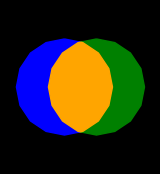

In [42]:
print('Overlaps Mask', bin_format(overlaps_def.mask))
print('Overlaps Value', bin_format(overlaps_def.value))

a, b = overlaps_simple_example()
relation_example(a, b, overlaps_def)

Relation Binary  111101111  |  111101111  |  111101111 
Relationship Relationship: Overlaps


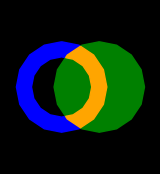

In [43]:
a, b = overlaps_ring_example()
relation_example(a, b, overlaps_def)

Relation Binary  111001001  |  111001001  |  111101111 
Relationship Relationship: Overlaps


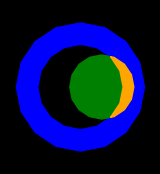

In [44]:
a, b = overlaps_surrounded_example()
relation_example(a, b, overlaps_def)

Relation Binary  111001001  |  111001001  |  111101101 
Relationship Relationship: Overlaps


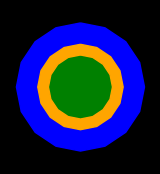

In [45]:
a, b = overlaps_ring_surrounded_example()
relation_example(a, b, overlaps_def)

Relation Binary  111001001  |  111001001  |  101111101 
Relationship Relationship: Overlaps


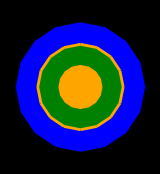

In [46]:
a, b = overlaps_archipelago_simple_example()
relation_example(a, b, overlaps_def)

## Equals

In [47]:

def equals_example1():
    box6 = shapely.Polygon(box_points(6))
    a = StructureSlice([box6])
    b = StructureSlice([box6])
    return a, b

def equals_example2():
    circle6 = shapely.Polygon(circle_points(3))
    circle5 = shapely.Polygon(circle_points(2.5))
    cropped_circle = shapely.intersection(circle6, circle5)
    a = StructureSlice([circle5])
    b = StructureSlice([cropped_circle])
    return a, b


Equals Mask  000000000  |  000000000  |  101001110 
Equals Value  000000000  |  000000000  |  100000000 
Relation Binary  100010001  |  100010001  |  100010001 
Relationship Relationship: Equals


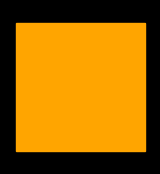

In [48]:
print('Equals Mask', bin_format(equals_def.mask))
print('Equals Value', bin_format(equals_def.value))

a, b = equals_example1()
relation_example(a, b, equals_def)

Relation Binary  100010001  |  100010001  |  100010001 
Relationship Relationship: Equals


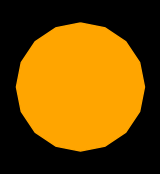

In [49]:
a, b = equals_example2()
relation_example(a, b, equals_def)

## Relationship Test Definitions

In [50]:
surrounds_def = RelationshipTest(RelationshipType.SURROUNDS,
                                 0b000000000100010110110110000,
                                 0b000000000100000000000000000)
shelters_def = RelationshipTest(RelationshipType.SHELTERS,
                                0b111000100110110000110110000,
                                0b111000000000000000000000000)
disjoint_def = RelationshipTest(RelationshipType.DISJOINT,
                                0b110110000110110000110110000,
                                0b000000000000000000000000000)
borders_def = RelationshipTest(RelationshipType.BORDERS,
                               0b000000000001001110110110000,
                               0b000000000001001110000010000)
interior_borders_def = RelationshipTest(RelationshipType.BORDERS_INTERIOR,
                                0b000000000101010110110110000,
                                0b000000000101000000000010000)
overlaps_def = RelationshipTest(RelationshipType.OVERLAPS,
                                0b000000000000000000101000100,
                                0b000000000000000000101000100)
partition_def = RelationshipTest(RelationshipType.PARTITION,
                                0b000000000000000000101010110,
                                0b000000000000000000101010000)
contains_def = RelationshipTest(RelationshipType.CONTAINS,
                                0b000000000000000000101010110,
                                0b000000000000000000101000000)
equals_def = RelationshipTest(RelationshipType.EQUALS,
                                0b000000000000000000101001110,
                                0b000000000000000000100000000)


In [51]:
test_binaries = [
    disjoint_def,
    shelters_def,
    surrounds_def,
    borders_def,
    interior_borders_def,
    overlaps_def,
    partition_def,
    contains_def,
    equals_def
    ]

In [52]:
def find_type(relation_binary, test_binaries):
    for rel_def in test_binaries:
        result = rel_def.test(relation_binary)
        if result:
            return result
    return RelationshipType.UNKNOWN

In [53]:
test_relations = [
    surrounds_example1,
    surrounds_example2,
    shelters_example,
    disjoint_example,
    borders_example1,
    borders_example2,
    interior_borders_example1,
    interior_borders_example2,
    overlaps_simple_example,
    overlaps_ring_example,
    overlaps_surrounded_example,
    overlaps_ring_surrounded_example,
    overlaps_archipelago_simple_example,
    partition_example1,
    partition_example2,
    partition_example3,
    partition_example4,
    contains_example1,
    contains_example2,
    contains_example3,
    equals_example1,
    equals_example2
]


#### Testing identify_relation function

In [54]:
results = []
for rel_test in test_relations:
    a, b = rel_test()
    relation_binary = relate(a,b)
    relation_name = identify_relation(relation_binary)
    result = f'{rel_test.__name__:>40s}\t{bin_format(relation_binary)}\t{str(relation_name)}'
    results.append(result)

for r in results:
    print(r)

NameError: name 'relate' is not defined

In [ ]:
def bin_2_test(rel_test: RelationshipTest) -> dict[str, str]:
    def to_dict(test_str):
        test_parts = test_str.split('|')
        test_dict = {'Hull': test_parts[0].strip(),
            'Exterior': test_parts[1].strip(),
            'Region': test_parts[2].strip()}
        return test_dict

    # Set test values to True or False
    value_str = bin_format(rel_test.value)
    value_str = value_str.replace('0', 'F')
    value_str = value_str.replace('1', 'T')
    # Replace masked parts with '*'
    mask = bin_format(rel_test.mask)
    test_chars = []
    for tst, msk in zip(value_str, mask):
        if msk == '0':
            chr = '*'
        else:
            chr = tst
        test_chars.append(chr)
    test_str = ''.join(test_chars)
    # Create test dictionary item
    labelled_test = {rel_test.relation_type.label: to_dict(test_str)}
    return labelled_test

In [ ]:
test_str_dict = {}
for rel_test in test_binaries:
    test_str_dict.update(bin_2_test(rel_test))
pd.DataFrame(test_str_dict).T

,Hull,Exterior,Region
Disjoint,FF*FF****,FF*FF****,FF*FF****
Shelters,TTT***F**,FF*FF****,FF*FF****
Surrounds,*********,T***F*FF*,FF*FF****
Borders,*********,**T**TTT*,FF*FT****
Borders_interior,*********,T*T*F*FF*,FF*FT****
Overlaps,*********,*********,T*T***T**
Partition,*********,*********,T*T*T*FF*
Contains,*********,*********,T*T*F*FF*
Equals,*********,*********,T*F**FFF*


## Test Text
Convert each relation `Value` and `Mask` pair into a test string:
1. Convert `Value` integer into a binary string
2. Replace `Value` *‘0’* with *‘F’*
3. Replace `Value` *‘1’* with *‘T’*
4. Replace `Value` with *'*'* where `Mask` is *'0'*


## Mask Ranking

In [ ]:
test_binaries.sort(key=lambda x: x.mask, reverse=True)
for test_bin in test_binaries:
    print(f'{test_bin.relation_type.name:18s}{bin_format(test_bin.mask):40s}\t{bin_format(test_bin.value):40s}')

SHELTERS           111000100  |  110110000  |  110110000  	 111000000  |  000000000  |  000000000  
DISJOINT           110110000  |  110110000  |  110110000  	 000000000  |  000000000  |  000000000  
BORDERS_INTERIOR   000000000  |  101010110  |  110110000  	 000000000  |  101000000  |  000010000  
SURROUNDS          000000000  |  100010110  |  110110000  	 000000000  |  100000000  |  000000000  
BORDERS            000000000  |  001001110  |  110110000  	 000000000  |  001001110  |  000010000  
PARTITION          000000000  |  000000000  |  101010110  	 000000000  |  000000000  |  101010000  
CONTAINS           000000000  |  000000000  |  101010110  	 000000000  |  000000000  |  101000000  
EQUALS             000000000  |  000000000  |  101001110  	 000000000  |  000000000  |  100000000  
OVERLAPS           000000000  |  000000000  |  101000100  	 000000000  |  000000000  |  101000100  
